In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv('MS_Financial Sample.csv', sep=';')

df.columns = df.columns.str.strip()

# Mostrar as 5 primeiras linhas
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1618,5","$3,00","$20,00","$32.370,00",$-,"$32.370,00","$16.185,00","$16.185,00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321,"$3,00","$20,00","$26.420,00",$-,"$26.420,00","$13.210,00","$13.210,00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178,"$3,00","$15,00","$32.670,00",$-,"$32.670,00","$21.780,00","$10.890,00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888,"$3,00","$15,00","$13.320,00",$-,"$13.320,00","$8.880,00","$4.440,00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470,"$3,00","$15,00","$37.050,00",$-,"$37.050,00","$24.700,00","$12.350,00",01/06/2014,6,June,2014


In [20]:
print(df.columns)

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')


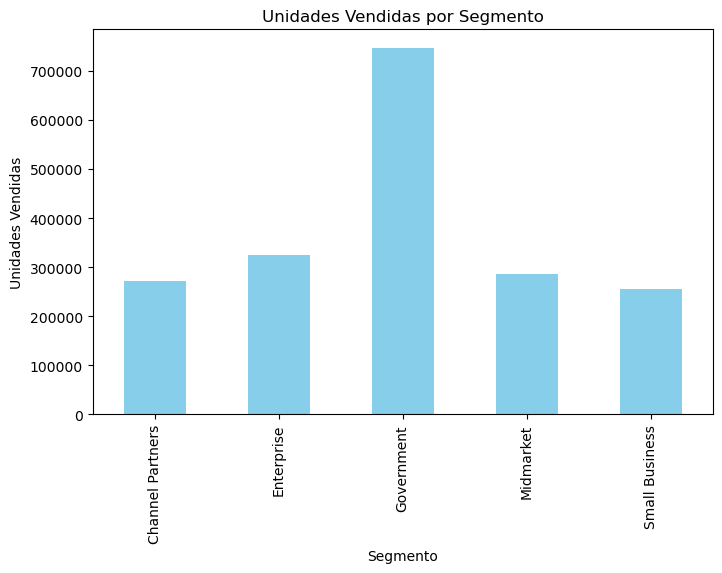

In [28]:
# Converter 'Profit' para numérico
df['Units Sold'] = pd.to_numeric(df['Units Sold'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

units_por_segmento = df.groupby('Segment')['Units Sold'].sum()

plt.figure(figsize=(8,5))
units_por_segmento.plot(kind='bar', color='skyblue')
plt.title('Unidades Vendidas por Segmento')
plt.ylabel('Unidades Vendidas')
plt.xlabel('Segmento')
plt.show()

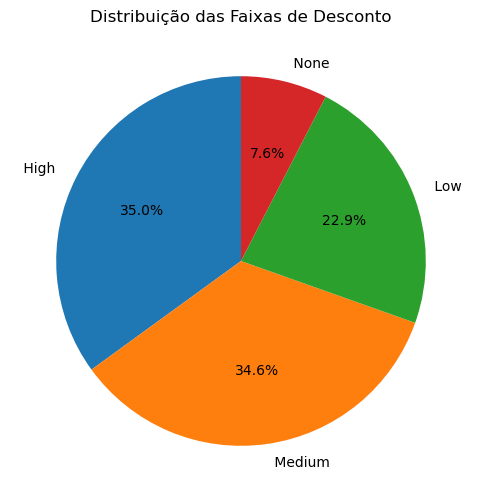

In [43]:
descontos = df['Discount Band'].value_counts()

plt.figure(figsize=(6,6))
descontos.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Faixas de Desconto')
plt.ylabel('')
plt.show()

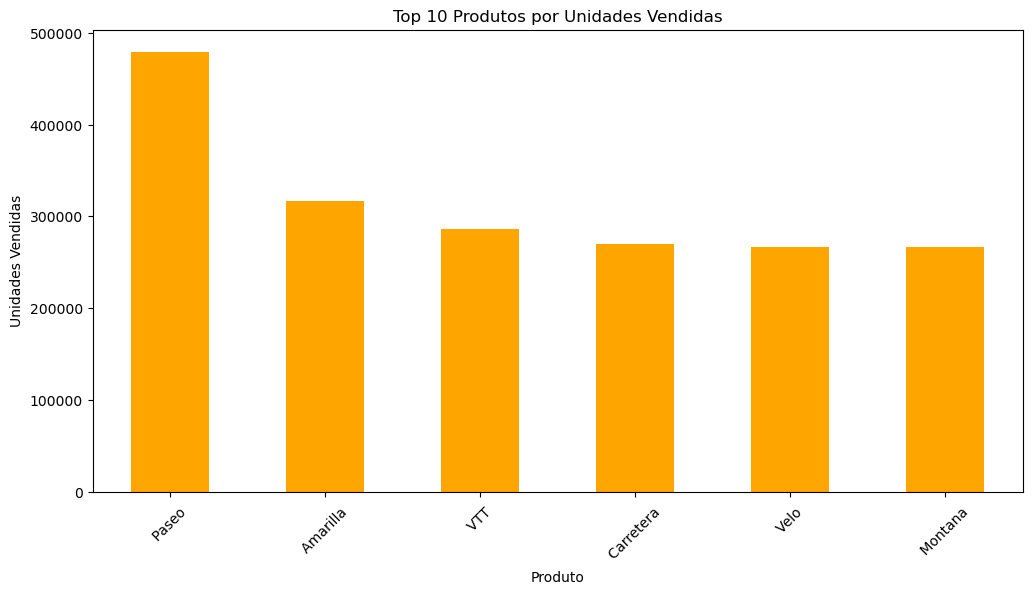

In [44]:
unidades_por_produto = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
unidades_por_produto.plot(kind='bar', color='orange')
plt.title('Top 10 Produtos por Unidades Vendidas')
plt.ylabel('Unidades Vendidas')
plt.xlabel('Produto')
plt.xticks(rotation=45)
plt.show()